**sklearn.feature_selection.VarianceThreshold**

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [3]:
# Loading necessary packages
from sklearn.feature_selection import VarianceThreshold 
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd 
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

Only looks at X not y, can be used for unsupervised

In [2]:
#We begin our implementations with Varience Threshold
x, y = load_iris(return_X_y=True, as_frame = True)
X = x.astype(int)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0
...,...,...,...,...
145,6,3,5,2
146,6,2,5,1
147,6,3,5,2
148,6,3,5,2


Var[x] = p(1-p)

In [3]:
sel = VarianceThreshold(.08 * (1 - .08))
X_new = sel.fit_transform(X)
X_new.shape

(150, 4)

To show it works in a smaller dataset

In [4]:
p = [[0, 2, 0, 3], 
    [0, 1, 4, 3], 
    [0, 1, 1, 3]]

In [5]:
selector = VarianceThreshold()
selector.fit_transform(p)

array([[2, 0],
       [1, 4],
       [1, 1]])

In [8]:
# We are tried to implemet perason correlation to 2 columns

def pearson_r(x, y):

# Compute correlation matrix: corr_mat
 corr_mat = np.corrcoef(x,y)
# Return entry [0,1]
 return corr_mat[0,1]
# Compute Pearson correlation coefficient for petal length (cm) and petal width (cm)


In [12]:
r = pearson_r(X['petal length (cm)'], X['petal width (cm)'])

print(r)

0.9087837835852177


In [2]:
#After Pearson correlation we started to implement code to find Mutual Information 

feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


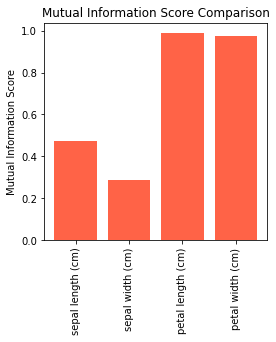

In [4]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()